# OSEMN Exercises

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [31]:
randomlistofnumber = np.random.rand(20)
print(randomlistofnumber)

# mode can be specified for writing, reading or both
a = open('simple_data.txt', 'w')
a.write(str(nb))    
a.close()

[0.08299739 0.90656112 0.34275542 0.03471278 0.34465983 0.12918323
 0.08765234 0.50307406 0.89061728 0.90064409 0.52582047 0.05775483
 0.40103003 0.96289027 0.12285403 0.14191493 0.57484008 0.03205842
 0.20645203 0.70398102]


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [61]:
randommatrix = np.random.rand(25).reshape(5,5)
print(randommatrix)
a = open('data.txt', 'w')
for tab in randommatrix :
    for nb in tab :
        a.write(str(nb))
        a.write(' ')
    a.write('\n')
a.close()

[[0.58707567 0.92436347 0.4400274  0.25883287 0.29422572]
 [0.58749875 0.23227106 0.346668   0.57908332 0.61932274]
 [0.91919658 0.06930554 0.54070735 0.78375103 0.47001892]
 [0.08035125 0.86207222 0.36178326 0.9483764  0.79678906]
 [0.63278755 0.35583687 0.33035542 0.37453651 0.89940495]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [32]:
import csv
data = np.loadtxt('data.txt')
print(data)
a = open('data.csv', 'w',newline='')
with a:
    writer = csv.writer(a,quoting=csv.QUOTE_ALL)
    writer.writerows(data )


[[0.58707567 0.92436347 0.4400274  0.25883287 0.29422572]
 [0.58749875 0.23227106 0.346668   0.57908332 0.61932274]
 [0.91919658 0.06930554 0.54070735 0.78375103 0.47001892]
 [0.08035125 0.86207222 0.36178326 0.9483764  0.79678906]
 [0.63278755 0.35583687 0.33035542 0.37453651 0.89940495]]


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [16]:
with  open('credit_card.dat','rb') as file:
    file_content=file.read()
    word_counter=0
    word_size = 6 # size of the word in bit
    credit_card = []
    cb = []
    for i in range(0, len(file_content), word_size):
        num = file_content[i:i+word_size]
        numchar=chr(int(num,2))
        if numchar == " ":
            cb.append(' ')
        elif numchar == '\n':
            credit_card.append(cb)
            cb=[]
        else :
            cb.append(numchar)
            
a = open('credit_card.txt', 'w')
for tab in credit_card :
    for nb in tab :
        a.write(nb)
    a.write('\n')
a.close()

data = np.loadtxt('credit_card.txt')
print(data)

[[7.648e+03 5.673e+03 3.775e+03 2.271e+03]
 [3.257e+03 8.247e+03 3.354e+03 2.266e+03]
 [2.722e+03 1.000e+00 4.011e+03 6.652e+03]
 [6.610e+02 3.063e+03 3.742e+03 3.150e+03]
 [4.320e+02 1.608e+03 1.462e+03 4.742e+03]
 [5.827e+03 2.027e+03 8.785e+03 7.303e+03]
 [5.774e+03 8.528e+03 2.087e+03 1.117e+03]
 [8.140e+03 1.210e+03 6.352e+03 2.845e+03]
 [5.764e+03 1.133e+03 7.301e+03 7.100e+03]
 [6.456e+03 1.737e+03 4.126e+03 6.726e+03]
 [1.228e+03 8.631e+03 7.382e+03 0.000e+00]
 [7.051e+03 1.600e+02 5.374e+03 3.166e+03]
 [6.180e+02 3.587e+03 1.630e+03 6.376e+03]
 [1.545e+03 5.454e+03 7.444e+03 5.636e+03]
 [6.735e+03 3.116e+03 3.202e+03 6.834e+03]
 [7.287e+03 5.011e+03 1.547e+03 8.413e+03]
 [7.033e+03 2.607e+03 3.328e+03 4.200e+03]
 [2.568e+03 5.244e+03 1.874e+03 5.024e+03]
 [1.684e+03 2.253e+03 7.570e+03 7.118e+03]
 [6.720e+02 2.576e+03 5.750e+02 6.631e+03]
 [6.332e+03 8.353e+03 8.787e+03 1.340e+03]
 [1.813e+03 3.361e+03 1.175e+03 4.211e+03]
 [2.477e+03 6.450e+03 8.840e+03 2.368e+03]
 [5.512e+03

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [28]:
import json
data = json.load(open('user_data.json'))

import csv
a = open('userdatafilterd.csv', 'w',newline='')
with a:
    writer = csv.writer(a,quoting=csv.QUOTE_ALL)
    writer.writerow(data[0])
    for person in data :
        if person['CreditCardType']=='American Express':
            tab= [person['ID'],person['JobTitle'],person['EmailAddress'],person['FirstNameLastName'],person['CreditCardType']]
            writer.writerow(tab)

        


6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x01292EE0>]],
      dtype=object)

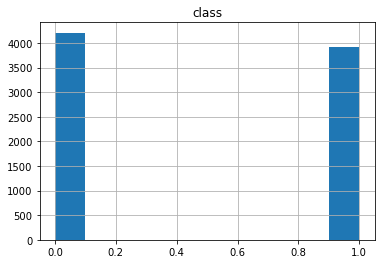

In [35]:
file_name="mushrooms_categorized.csv"
data=pd.read_csv(file_name,nrows=8125)
data.columns=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
data
data.hist("class")


7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

8\. Load the same file of point 6, and convert the file to json with Pandas.